<a href="https://colab.research.google.com/github/mxchauhan/Capstone/blob/master/Capstone_Project_Rating_of_Apps_at_Google_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [434]:
#Upload data and rename data column names

dataPath = ("https://raw.githubusercontent.com/mxchauhan/Capstone/master/googleplaystore.csv")

data = pd.read_csv(dataPath)

data.columns = ['app',
                'category',
                'rating',
                'reviews',
                'size',
                'installs',
                'type',
                'price',
                'contentRating',
                'genres',
                'updated',
                'version',
                'androidVersion']

data.head()

,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


We drop the type column, as it's redundant with the price column (a price = 0 means that the app is free).

In [435]:
data['type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [436]:
data['price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

# sample one hot encoding

```
genres = ["Art", "Creativity", "Pretend Play"]
app1 = [1, 0, 0]
app2 = [1, 0 , 1]
```

+ Use a `MultilabelBinarizer` to encode these features
https://chrisalbon.com/machine_learning/preprocessing_structured_data/one-hot_encode_features_with_multiple_labels/

+ An alternative would be to use dummy variables https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

+ Understanding the tradeoffs when using one-hot encoding vs dummy variables https://stats.stackexchange.com/questions/224051/one-hot-vs-dummy-encoding-in-scikit-learn

In [437]:
data.shape

(10841, 13)

In [438]:
data.genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

## DATA CLEANING

In [0]:
data['genres'] = data.genres.str.split(';')

In [440]:
data.isnull().values.ravel().sum()

1487

In [441]:
# we drop the NaNs
data.dropna(inplace=True)

#we check that the inplace transformation worked
data.isnull().values.ravel().sum()

0

In [442]:
data.shape

(9360, 13)

In [443]:
data.price.unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$7.99 ', '$5.99 ', '$2.99 ',
       '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ', '$9.00 ',
       '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ', '$16.99 ',
       '$14.99 ', '$29.99 ', '$12.99 ', '$2.49 ', '$10.99 ', '$1.50 ',
       '$19.99 ', '$15.99 ', '$33.99 ', '$39.99 ', '$3.95 ', '$4.49 ',
       '$1.70 ', '$8.99 ', '$1.49 ', '$3.88 ', '$399.99 ', '$17.99 ',
       '$400.00 ', '$3.02 ', '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ',
       '$2.50 ', '$1.59 ', '$6.49 ', '$1.29 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$8.49 ', '$1.75 ', '$14.00 ',
       '$2.00 ', '$3.08 ', '$2.59 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$13.99 ', '$4.29 ', '$3.28 ', '$4.60 ',
       '$1.00 ', '$2.95 ', '$2.90 ', '$1.97 ', '$2.56 ', '$1.20 '],
      dtype=object)

In [444]:
data.contentRating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [445]:
data['size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

We drop both the date of update and androidVersion columns, as we don't find them particularly informative. The [high segmentation of the Android market](https://sensortower.com/blog/how-to-handle-android-segmentation-when-developing-a-google-play-app) can be source of noise. Additionally, many of our entries have a "varies with device" value in the version specification.

![android version](https://s3.amazonaws.com/sensortower-itunes/blog/0141-android-versions.jpg)

In [446]:
data['updated'].unique()

array(['7-Jan-18', '15-Jan-18', '1-Aug-18', ..., '20-Jan-14', '16-Feb-14',
       '23-Mar-14'], dtype=object)

In [447]:
data.androidVersion.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [0]:
# Masks for taking mega and kilo values, used 
# to later convert size strings into numeric

mega = data['size'].str.contains('M')

kilo = data['size'].str.contains('k')

In [0]:
data['size'] = data['size'].str.strip('k')
data['size'] = data['size'].str.strip('M')
data['size'] = pd.to_numeric(data['size'], errors='coerce')

In [450]:
data['size'].loc[mega] = data['size'].loc[mega] * 1000000
data['size'].loc[kilo] = data['size'].loc[kilo] * 1000
data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,[Art & Design],7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,"[Art & Design, Pretend Play]",15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,[Art & Design],1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,[Art & Design],8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,"[Art & Design, Creativity]",20-Jun-18,1.1,4.4 and up


In [451]:
print ((data.installs == 'Free').astype(int).sum())
print ((data.price == 'Everyone').astype(int).sum())

0
0


In [452]:
data[(data.installs == 'Free')]

,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion


In [453]:
print ((data.contentRating == 'Unrated').astype(int).sum())

1


In [454]:
data.shape

(9360, 13)

**We drop or the row that has 'Free' as number of installs for the app and price equal to 'Everyone', as these are values that have spilled from other columns and are obvious data collection errors** 





In [455]:
data = data[~(data.installs == 'Free')]

data.shape

(9360, 13)

In [456]:
data.installs = data.installs.str.strip('+')
data.installs = data.installs.str.replace(',','')
data.installs.unique()


array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [457]:
data.price = data.price.str.strip('$')
data.price = data.price.str.strip(' ')

data.price.unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [458]:
everyone = data['contentRating'] == 'Everyone'
everyone10 = data['contentRating'] == 'Everyone 10+'
teen = data['contentRating'] == 'Teen'
mature = data['contentRating'] == 'Mature 17+'
adult = data['contentRating'] == 'Adults only 18+'
unrated = data['contentRating'] == 'Unrated'

data['contentRating'].loc[everyone] = 0
data['contentRating'].loc[everyone10] = 10
data['contentRating'].loc[teen] = 13
data['contentRating'].loc[mature] = 17
data['contentRating'].loc[adult] = 18
data['contentRating'].loc[unrated] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [459]:
data.type.unique()

array(['Free', 'Paid'], dtype=object)

In [0]:
data['reviews'] = pd.to_numeric(data['reviews'], errors='coerce')
data['installs'] = pd.to_numeric(data['installs'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [461]:
# we drop ratings equal to zero, as the app store doesn't allow a real user 
# rating to be equal to zero
data = data[data['rating']> 0]
data.head()

,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,0,[Art & Design],7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,0,"[Art & Design, Pretend Play]",15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,0,[Art & Design],1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,13,[Art & Design],8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,0,"[Art & Design, Creativity]",20-Jun-18,1.1,4.4 and up


In [462]:
data

,app,category,rating,reviews,size,installs,type,price,contentRating,genres,updated,version,androidVersion
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,0,[Art & Design],7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,0,"[Art & Design, Pretend Play]",15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,0,[Art & Design],1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,13,[Art & Design],8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,0,"[Art & Design, Creativity]",20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,0,[Art & Design],26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,0,[Art & Design],26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0.0,0,[Art & Design],14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0.0,0,[Art & Design],20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,0,"[Art & Design, Creativity]",3-Jul-18,2.8,4.0.3 and up


In [0]:
# we drop na again because some conversions may result in nan values
data.dropna(inplace=True)

##DATA EXPLORATION

In [0]:
def reject_outliers(data):
    u = np.mean(data)
    s = np.std(data)
    data_filtered = data[(data > u-2*s) & (data < u+2*s)]
    return data_filtered

In [0]:
#data.rating = reject_outliers(data.rating)
#data.reviews = reject_outliers(data.reviews)
#data['size'] = reject_outliers(data['size'])
#data.installs = reject_outliers(data.installs)
#data.price = reject_outliers(data.price)

In [466]:
data.rating.describe()

count    7723.000000
mean        4.173935
std         0.544638
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

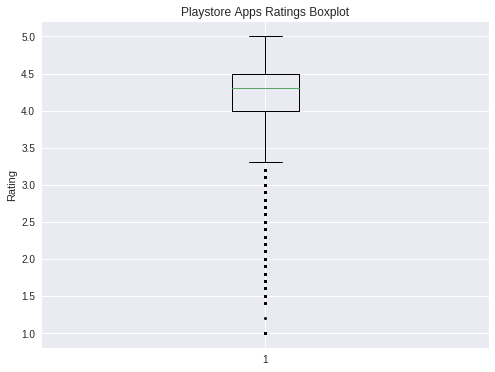

In [467]:
x = data.rating
plt.figure(figsize = (8, 6))
plt.ylabel('Rating')
plt.title('Playstore Apps Ratings Boxplot')
plt.boxplot(x, sym="k.")
plt.show()

In [468]:
data.reviews.describe()

count    7.723000e+03
mean     2.948983e+05
std      1.863933e+06
min      1.000000e+00
25%      1.075000e+02
50%      2.332000e+03
75%      3.905300e+04
max      4.489389e+07
Name: reviews, dtype: float64

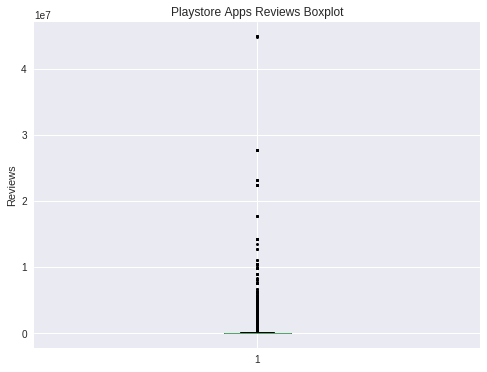

In [469]:
x = data.reviews
plt.figure(figsize = (8, 6))
plt.ylabel('Reviews')
plt.title('Playstore Apps Reviews Boxplot')
plt.boxplot(x, sym="k.")
plt.show()

The boxplot obtained is what one would expect out of a large [long tailed distribution](https://en.wikipedia.org/wiki/Long_tail). We use a histogram here to show it. 

https://python-graph-gallery.com/20-basic-histogram-seaborn/

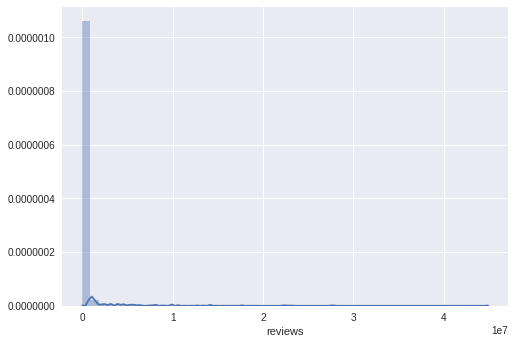

In [470]:
# Import library and dataset
import seaborn as sns

 
sns.distplot( data["reviews"] )
#sns.plt.show()
 
# Control the number of bins
#sns.distplot( data["reviews"], bins=20 )
#sns.plt.show()


In [471]:
# we have apps in the range of 1 reviews up to 44 million reviews 
np.sort(data.reviews.unique())

array([       1,        2,        3, ..., 44881447, 44891723, 44893888])

In [472]:
data['rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

4.4 is the most frequent rating. 

In [473]:

# https://stackoverflow.com/a/39787748/45963
ratings, counts = np.unique(data['rating'], return_counts=True)

d = {'ratings': ratings, 'counts': counts}

pd.DataFrame(data=d)

,counts,ratings
0,16,1.0
1,1,1.2
2,3,1.4
3,3,1.5
4,4,1.6
5,8,1.7
6,8,1.8
7,12,1.9
8,11,2.0
9,8,2.1


The scatterplot shows that apps that have higher ratings tend to be more popular, as they have a higher number of reviews. 

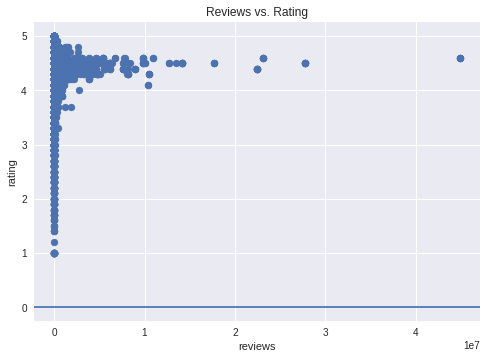

In [474]:
plt.scatter(data.reviews, data.rating)
plt.xlabel('reviews')
plt.ylabel('rating')
plt.axhline(y=0)
plt.title('Reviews vs. Rating')
plt.show()


We seem to have a long tailed distribution, which has its own sets of challenges/considerations for regression analysis. 

http://mockinterview.co/index.php/question/explain-what-a-long-tailed-distribution-is-and-provide-three-examples-of-relevant-phenomena-that-have-long-tails-why-are-they-important-in-classification-and-regression-problems/

idea: use the log of reviews vs the log of ratings for regression analysis 

https://stats.stackexchange.com/questions/111385/how-to-best-plot-a-heavy-vs-light-tailed-distribution-in-r

In [0]:
data['logReviews'] = np.asarray([np.log10(x) for x in data.reviews])
data['logRating'] = np.asarray([np.log10(x) for x in data.rating])

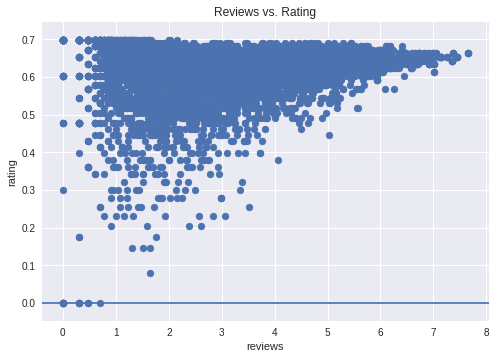

In [476]:
plt.scatter(data.logReviews, data.logRating)
plt.xlabel('reviews')
plt.ylabel('rating')
plt.axhline(y=0)
plt.title('Reviews vs. Rating')
plt.show()

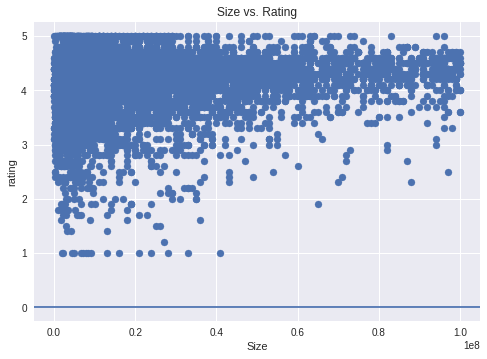

In [477]:
plt.scatter(data['size'], data.rating)
plt.xlabel('Size')
plt.ylabel('rating')
plt.axhline(y=0)
plt.title('Size vs. Rating')
plt.show()

Idea: we calculate the Spearman correlation on these features 

https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html

https://www.youtube.com/watch?v=2SCg8Kuh0tE

https://www.youtube.com/watch?v=0qLKfMm45-4

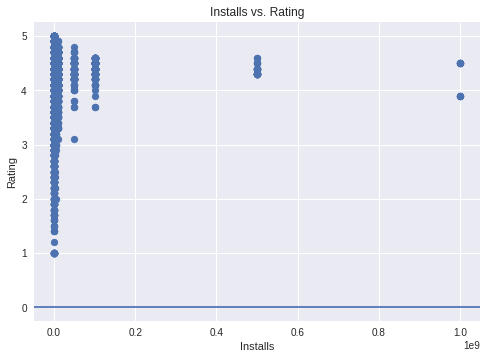

In [478]:
plt.scatter(data.installs, data.rating)
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.axhline(y=0)
plt.title('Installs vs. Rating')
plt.show()

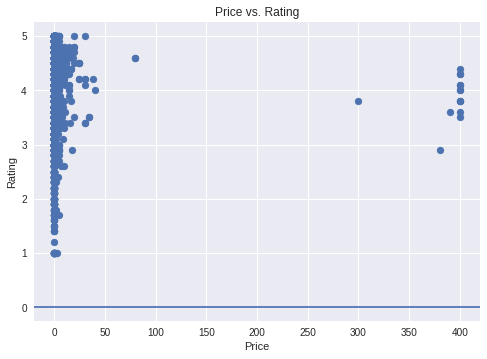

In [479]:
plt.scatter(data.price, data.rating)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.axhline(y=0)
plt.title('Price vs. Rating')
plt.show()

# to do: plot normalized price vs normalized rating (use output of MinMaxScaler)

In [480]:
import math
import numpy as np

#math.log(0.0)
np.log2(0.0)

np.log10(100000000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


8.0

In [481]:
from scipy.stats import spearmanr
spearmanr(data.price, data.rating)

SpearmanrResult(correlation=0.06099488912563197, pvalue=8.122111252011464e-08)

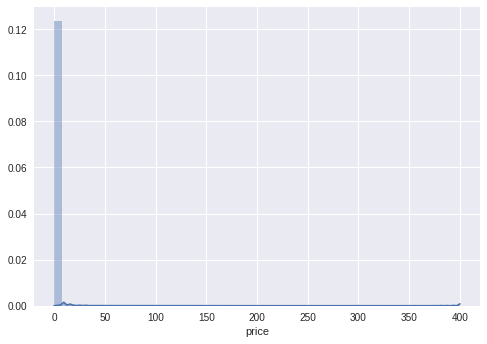

In [482]:
# Import library and dataset
import seaborn as sns

 
sns.distplot( data["price"] )

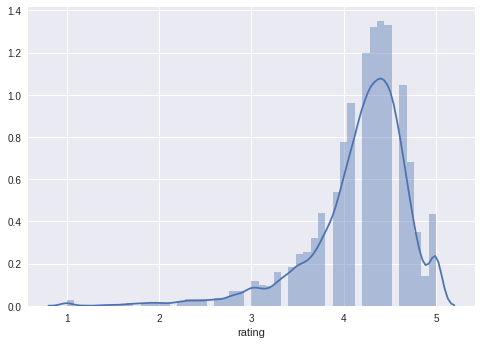

In [483]:
# Import library and dataset
import seaborn as sns

 
sns.distplot( data["rating"] )

In [484]:
spearmanr(data.installs,data.rating)

SpearmanrResult(correlation=0.030545300526528554, pvalue=0.007263160102855046)

In [485]:
#as the data.price and data.

from scipy.stats import pearsonr

pearsonr(data.price, data.rating)


(-0.021320384654006957, 0.060991388927049264)

A comparison of Pearson vs Spearman correlation is interesting here. For Pearson correlation analysis, the variables should be normally distributed, which is not the case for these distributions: the distribution of price has a long tail and the distribution of rating is skewed to the left. The Pearson correlation value is derived from the fitting of a regular linear regression, as the distributions here are not normally distributed and highly disimilar the correlation appears to be low, negative and not statistically significant (the p-value > 0.5). The P-value is the probability that we would have found the current result if the correlation coefficient were $= 0$(null hypothesis). If this probability is lower than the conventional $5\%$ ($\textit{p-value}<0.05$) the correlation coefficient is called statistically significant.

Spearman's rank correlation only cares about the agreement of the rankings in price and rating. It's low value and its low p-value indicate that there is low agreement between increases or decreases in price and rating.  Spearman's rank correlation is more appropriate for testing non-linear relationships between variables than Pearson's correlation. 

In [486]:
# Import library and dataset
import seaborn as sns
import numpy as np
 
#sns.distplot(np.log10(data["price"]) )

#np.log10(data['price'])
print('mode of price is = ' + str(data['price'].mode()[0]))
data['price'].describe()


mode of price is = 0.0


count    7723.000000
mean        1.128169
std        17.408036
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: price, dtype: float64

Befor applying a log transformation, we have to filter the values that have a logarithm equal to zero. 

In [487]:
data['price'].mode()

0    0.0
dtype: float64

In [0]:
data.dropna(inplace=True)

##FEATURES

In [0]:
features = data[['rating', 'reviews', 'size','installs', 'price', 'contentRating']]

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaledTrainData = scaler.fit(features)

scaledTrainData = scaler.transform(features)

features = pd.DataFrame(scaledTrainData, columns=['rating', 'reviews', 'size','installs', 'price', 'contentRating'])

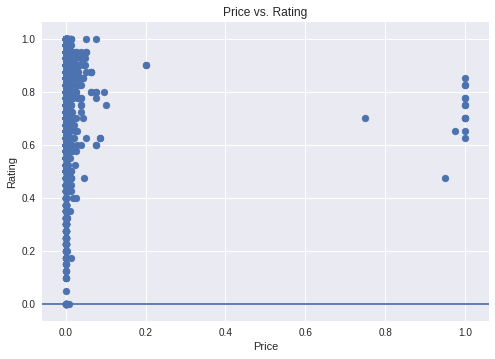

In [491]:
plt.scatter(features.price, features.rating)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.axhline(y=0)
plt.title('Price vs. Rating')
plt.show()

In [0]:
features['reviews2'] = np.asarray([x**(1/2) for x in features.reviews])
features['reviews3'] = np.asarray([x**(3) for x in features.reviews])

features['installs2'] = np.asarray([x**(2) for x in features.installs])
features['installs3'] = np.asarray([x**(1/3) for x in features.installs])

In [0]:
#features['logReviews'] = np.asarray([np.log10(x) for x in features.reviews])
#features['logRating'] = np.asarray([np.log10(x) for x in features.rating])

In [0]:
# we add a binary feature that evaluates to true
# when rating is above the median (useful for logistic regression)
features['positiveRating'] = np.where(data['rating']>=4.3, 1, 0)

In [553]:
type(data.genres)

pandas.core.series.Series

In [554]:
features2 = pd.get_dummies(data['genres'].apply(pd.Series).stack()).sum(level=0)
features2.head()

,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# let's ask this in StackOverflow: why are the features turning into NaN when the datasets are merged? 
featuresAll = pd.concat([features, features2], axis=1)

In [0]:
featuresAll.dropna(inplace=True)

In [557]:
featuresAll.head()

,rating,reviews,size,installs,price,contentRating,reviews2,positiveRating,reviews3,installs2,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,0.775,0.000004,0.189931,0.00001,0.0,0.000000,0.001876,0.0,4.359228e-17,9.998000e-11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.725,0.000022,0.139927,0.00050,0.0,0.000000,0.004639,0.0,9.962533e-15,2.499990e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925,0.001949,0.086922,0.00500,0.0,0.000000,0.044150,1.0,7.406219e-09,2.499999e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.875,0.004803,0.249936,0.05000,0.0,0.722222,0.069307,1.0,1.108267e-07,2.500000e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.825,0.000022,0.027917,0.00010,0.0,0.000000,0.004639,1.0,9.962533e-15,9.999800e-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##DATA MODELING

### LOGISTIC REGRESSION

In [0]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [559]:
lr = LogisticRegression(C=1.0)
X = featuresAll.drop(['rating', 'positiveRating'], axis=1)
Y = featuresAll.positiveRating

X.fillna(value=0, inplace= True)

# Fit the model.
fit = lr.fit(X, Y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Confusion matrix')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X, Y))

Coefficients
[[ 1.37276398e+00  3.11594517e-01  9.53305926e-02 -7.57329742e-01
  -2.29831869e-01  7.57198845e+00  2.30479952e-02 -4.67243046e-01
  -8.28511776e-01 -4.76463531e-02  1.49532814e-01 -1.64720119e-01
   1.34554805e-01  1.74606872e-01  4.60413670e-01  4.72785043e-01
   3.55764647e-01 -2.99212877e-02  1.83407462e-01  3.75433329e-02
   5.06979968e-02 -9.61630186e-01 -6.30328020e-02 -4.44417968e-02
  -1.78663636e-01  9.33076089e-02  3.33071252e-01  1.80340704e-01
  -5.26958829e-01  3.89386188e-02  6.64896787e-01  1.99764074e-02
   6.24927307e-01  5.49930063e-01  7.57407476e-01  1.38041158e-01
   6.19453473e-02 -8.89106761e-02  5.48847197e-02  1.67323281e-01
  -3.29054218e-01 -3.87095424e-01  3.37343177e-01 -3.20125138e-01
   1.01877742e-01 -1.02404509e-01 -1.57111756e-02 -1.74865835e-01
  -1.27070763e-01 -9.58522986e-02  4.58869650e-01 -9.04472134e-02
  -2.46946906e-01  2.38078927e-01  2.66840307e-01  5.05023732e-01
  -4.32704200e-02 -1.90260258e-01 -1.45719615e-03 -4.59772633e-

### RIDGE REGRESSION

In [560]:
from sklearn import linear_model

ridgeregr = linear_model.Ridge(alpha=.05, fit_intercept=True) 
ridgeregr.fit(X, Y)
print(ridgeregr.score(X, Y))
origparams = ridgeregr.coef_[0]
print(origparams)

0.08926572928762333
-8.095906368925027


In [561]:
print(ridgeregr.score(X, Y))

0.08926572928762333


We're getting a negative $R^2$ value, [which implies that the prediction is doing a worse job than using the mean value as a prediction](http://www.fairlynerdy.com/what-is-r-squared/). The question now is why do we obtain this.  



### LASSO REGRESSION

**TODO: add powers of the features that we have to the data column in order to fit a higher order polynomial.**  

https://stats.stackexchange.com/a/58747/13406

In [0]:
from sklearn.metrics import r2_score

lass = linear_model.Lasso(alpha=.05)
lassfit = lass.fit(X, Y)
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
#print('R² for the model with few features:')

In [563]:
from sklearn.metrics import r2_score

y_pred = lassfit.predict(X)
print(r2_score(Y, y_pred))  


0.0


In [564]:
print(r2_score(Y, y_pred))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

0.0

Parameter estimates for the model with few features:
[ 0.          0.          0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.          0.          0.          0.          0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.          0.          0.         -0.          0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.          0.53393086]


### RANDOM FOREST

In [565]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = featuresAll.drop(['rating', 'positiveRating'], axis=1)
Y = featuresAll['positiveRating']
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.6179159 , 0.55575868, 0.40585009, 0.32541133, 0.50091408,
       0.55393053, 0.55758684, 0.55210238, 0.61355311, 0.59266055])

### LINEAR REGRESSION

In [566]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
Y2 = featuresAll['rating'].values.reshape(-1, 1)
X2 = featuresAll.drop(['rating', 'positiveRating'], axis=1)

# impute 0 to nans
X2.fillna(value=0, inplace= True)

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.nan_to_num.html
np.nan_to_num(Y2, copy=False)


regr.fit(X2,Y2)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y2))


Coefficients: 
 [[-2.06682790e+00  4.79510936e-03 -2.62036184e-01 -3.80525747e-02
  -2.88707734e-03  1.50025592e+00  8.77203438e-01  4.94282756e-01
  -2.91214932e-01  1.62359029e-02  1.03186455e-02 -9.53715252e-03
   2.34738883e-02  6.06841772e-02  6.67430677e-02  5.14734608e-02
   4.92165701e-02  2.49790100e-02  2.39831892e-02  2.07060509e-02
  -4.21649080e-03 -4.41247875e-02  2.09091566e-02  1.45333975e-02
   1.53961833e-03  1.84384183e-02  5.53735837e-02  2.95381519e-02
  -2.72707641e-02  1.69382812e-02  5.97525349e-02  1.75208321e-02
   5.30809015e-02  3.76955860e-02  7.15905867e-02  4.85121833e-02
   1.97993384e-02 -1.34035587e-02  4.18375306e-02  3.43174317e-02
  -6.39536564e-03 -2.06090721e-02  4.80530356e-02  7.85322434e-03
   1.49047191e-02  8.22406928e-03  1.40017408e-02 -5.75465915e-03
   1.80044785e-02 -7.32293982e-03  3.95404358e-02  1.30567956e-02
   6.36682173e-03  2.95811532e-02  3.21143053e-02  2.15582116e-02
   7.39697949e-03  7.41688450e-03 -1.61522713e-02 -8.403475

**TO DO: add a RandomForestRegressor**

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [567]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X2, Y2)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
print(regr.feature_importances_)
print(regr.predict([[0, 0, 0, 0]]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.29383834 0.         0.1790327  0.         0.         0.34717804
 0.         0.         0.17995092 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


ValueError: ignored

## Ideas for Analysis

+ We can do regression analysis of ratings using the following models:
  * K-nn
  * Random forest
  * Ridge regression
  * Lasso regression
  
  ***"Make sure to think about explanatory versus predictive power and experiment with both.""***

+ We can write a binary classifier that will predict whether a particular app will have a rating above or below the population's median.  

  * Logistic regression
  * Random forest 
  * K-nn 

+ We are gonna compare the performance of the different classifiers and finetune their performance using GridSearchCV (which is search for optimal hyperparameters in a cross validated grid search) and StochasticSearchCV

### References
+ http://scikit-learn.org/stable/modules/grid_search.html
+ http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
+ http://scikit-learn.org/0.15/modules/generated/sklearn.grid_search.GridSearchCV.html

### Homework

+ Explain the differences between GridSearchCV and RandomizedSearchCV:
  * Which of these methods is more exhaustive?
  - GridSearch CV, considers all possible parameter combinations
  
  * Which of these methods is faster?
  - RandomizedSearchCV, fixed number of parameter settings are sampled, does not consider all combinations
  
  * How do we make the results of RandomizedSearchCV reproducible?
  - random_state
  
+ Learn a bit of Google Slides (it's easy!):
  + https://www.google.com/slides/about/
  
## Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

+ A specified research question your model addresses
+ How you chose your model specification and what alternatives you compared it to
+ The practical uses of your model for an audience of interest
+ Any weak points or shortcomings of your model